# Project: Investigate a Dataset - [Database_TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I have selected the **Database_TMDb_movie_data** to investigate it and explore the correlations between the varies things on it like the popularity and the budget, if the budget bigger is that mean that the popularity will be big, is the profit is an indecator for the popularity of the movie and is there a corelation between the popularity and votes and who are the top rated directors and actors and so on


#### Question(s) for Analysis
<ul>
<li>First question after importing and wrangling the data is what is the profit of every film to use it to find the correlations in the coming questions and you will see it <a href="#Q1">here</a></li>
<li>Also it is important for me to know the most popular and top rated directors and actors and you will find it <a href="#Q2">here</a> and <a href="#Q5">here</a></li>
<li>Finally it is important to know the difference between the film production before the 2000s and after 2000s in some questions like <a href="#Q3">here</a></li> and <a href="#Q4">here</a></li>
</ul>

### importing Liberaries and DataFrame
>This section is to import the necessary liberaries and DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling section
> In this section we will do some gathering, assessing and cleaning to the data to be more suatable and easy to analyse

In [3]:
df.shape

(10866, 21)

Now we know that the data has more than 10K observations and 21 column.

Lets look at the first 5 observations.

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


lets take look at the columns names and data types and the number of the missing data on each one

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> After gathering the data seems that we have a many missing data on the 'tagline', 'homepage','Keywords' and 'production_companies' columns and we will not use them on our investigation so lets drop then

In [6]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

Now we can drop all Null values from the dataframe

In [7]:
df.dropna(inplace=True)

Finally for cleaning the data let's take look at the number of duplicated values and drop them

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10724 non-null  int64  
 1   imdb_id         10724 non-null  object 
 2   popularity      10724 non-null  float64
 3   budget          10724 non-null  int64  
 4   revenue         10724 non-null  int64  
 5   original_title  10724 non-null  object 
 6   cast            10724 non-null  object 
 7   director        10724 non-null  object 
 8   overview        10724 non-null  object 
 9   runtime         10724 non-null  int64  
 10  genres          10724 non-null  object 
 11  release_date    10724 non-null  object 
 12  vote_count      10724 non-null  int64  
 13  vote_average    10724 non-null  float64
 14  release_year    10724 non-null  int64  
 15  budget_adj      10724 non-null  float64
 16  revenue_adj     10724 non-null  float64
 17  profit          10724 non-null 

Now we have cleaned data without missing or duplicated values and ready to be explored

<a id='eda'></a>
## Exploring Data Section
> After wrangling the data, In this section we will answer some questions by analysing the data to create some Conclusions about the dataframe.
> All these questions is from my deep mind and of course you may have different questions so don't be restricted by this questions.

<a id='Q1'></a>
#### Q1: What is the profit for every film?

In [11]:
#Creating new column named 'profit' equals the difference between the budget and the revenue of every film
df['profit'] = df['revenue'] - df['budget']

In [12]:
df.head(13)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,678708609


Now we have a profit column for each film

In [14]:
df[df['revenue']==df['revenue'].max()]['original_title']

1386    Avatar
Name: original_title, dtype: object

The name of the film with the biggest revenue ever is **Avatar**

#### Q3: What is the film with the biggest budget in a 2007?

In [15]:
df[df['budget'] == df[df['release_year'] == 2007]['budget'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09,661000000


The film with the biggest budget in a 2007 was **Pirates of the Caribbean: At World's End** with budget 300M $

#### Q4: what is the correlation between the budget and the popularity?
*i.e. is the film with bigger budget means that it have bigger popularity?*

In [16]:
df[['budget','popularity']].corr()

,budget,popularity
budget,1.000000,0.544197
popularity,0.544197,1.000000


Now let's figure it out as plot but before that let's create a function to do our plot quickly.

In [17]:
def sctr_plt(df, X, Y):
    plt.scatter(x = df[X], y = df[Y], s = 5)
    plt.title('correlation between {} & {}'.format(X,Y).title(), fontsize = 15)
    plt.xlabel(X.title(), fontsize = 15)
    plt.ylabel(Y.title(), fontsize = 15)

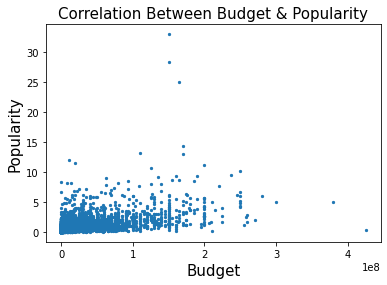

In [18]:
sctr_plt(df, 'budget', 'popularity')

Seems it does have weak correlation so if a film have big budget it has small chance to has big popularity.

<a id = 'Q5'></a>
#### Q5: what is the top rated action movie?
That want some works on it because we have the genres colomn as string so we have to create a fuction to extract the wanted word from a given string.

## That is a function to avoid repetitive code.
#### and it's used twice, the first one in this question and the second one on Q7

In [40]:
def cont(word ,string):
    if word in string.lower():
        return True
    else:
        return False

Then create new dataframe and stor the dataframe after selecting the action word fron the genre.

In [41]:
df1 = df[df['genres'].apply(lambda x: cont('action',x))]

Finally we select the movie/s with the maximum vote.

In [42]:
df1[df1['vote_average'] == df1['vote_average'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,816921825


We have two films **The Dark Knight** in 2008 and **Kill Bill: The Whole Bloody Affair** in 2011 with the same rating **8.1**.

#### Q6: What is the number of films that was directed by Robert Schwentke?
Here we can use the query() method to select all films that directed by Robert Schwentke.

In [43]:
df.query('director == "Robert Schwentke"').count()[0]

5

#### Q7: What is the active years of the actor vin diesel?
Here we can use the lambda function to use the function that we have created in <a href = '#Q5'>Q5</a> to find the films with the actor in its cast.

In [44]:
df[df['cast'].apply(lambda x: cont('vin diesel',x))]['release_year'].value_counts().sort_index()

1999    1
2000    2
2001    2
2002    1
2003    1
2004    1
2005    1
2008    1
2009    1
2011    1
2013    2
2014    1
2015    2
Name: release_year, dtype: int64

#### Q8: What is the top rated movie in 70s?
We can use the query method to select films with release year between 1970 and 1980

In [45]:
df2 = df.query('release_year >= 1970' and 'release_year < 1980')
df2[df2['vote_average'] == df2['vote_average'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09,239066411


The top rated movie in 70s is *The Godfather* with *8.3* average votes and was released in *1972*

<a id = 'Q2'></a>
#### Q9: Who is the most popular director?
Here we can use the groupby() method to group the data frame by the directors name then selects the director with the biggest summation of popularity.

In [46]:
dfmax = df.groupby('director').sum()
dfmax[dfmax['popularity'] == dfmax['popularity'].max()]

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
director,,,,,,,,,,,
Christopher Nolan,235515,61.560756,1005000000,4167548502,1135,41561,61.1,16057,1.014694e+09,4.164262e+09,3162548502


Christopher Nolan is the most popular director with summation of popularity equals almost 62.

#### Q10: What is the correlation between the popularity and the profit?

In [47]:
df[['profit','popularity']].corr()

,profit,popularity
profit,1.00000,0.59608
popularity,0.59608,1.00000


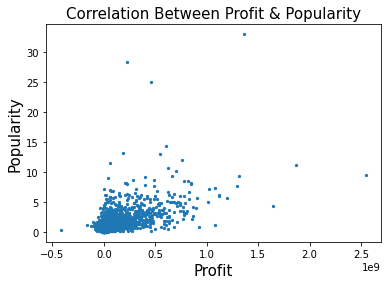

In [48]:
sctr_plt(df, 'profit', 'popularity')

Seems it has a bit strong correlation.

#### Q11: What is the correlation between the popularity and votes?

In [49]:
df[['vote_average','popularity']].corr()

,vote_average,popularity
vote_average,1.00000,0.31775
popularity,0.31775,1.00000


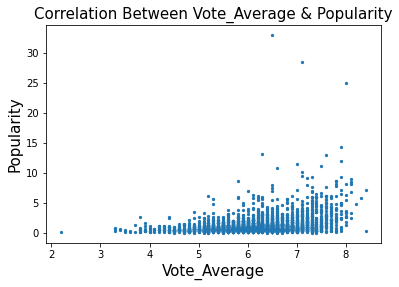

In [50]:
sctr_plt(df, 'vote_average', 'popularity')

The corelation is very weak.

#### Q12: State a diagram between the revenue from 2015 until now
First we will create an temporary df and store the summation of the revenue on each year on it

In [51]:
df_temp = df.query('release_year >= 2010')[['revenue', 'release_year']].groupby('release_year').sum()
df_temp

,revenue
release_year,
2010,21804360476
2011,23408245247
2012,24151056032
2013,24350666103
2014,24069969357
2015,26202922801


Then state the histogram based on the temporary df

Text(0, 0.5, 'Total Revenue')

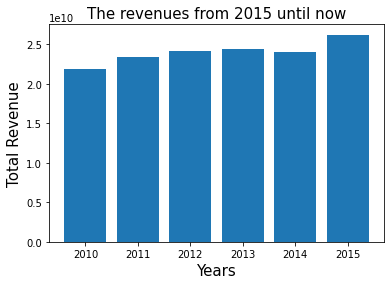

In [53]:
years = ['2010', '2011', '2012', '2013', '2014', '2015']
plt.bar(years, df_temp['revenue'])
plt.title('The revenues from 2015 until now', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Total Revenue', fontsize = 15)

<a id = 'Q3'></a>
#### Q13: What is the profit difference before 2000 and after 2000?

In [54]:
df.query('release_year >= 2000')['profit'].sum() - df.query('release_year < 2000')['profit'].sum()

116607101546

<a id = 'Q4'></a>
#### Q14: What is the difference in movies length before 2000s and after 2000s?

In [55]:
mean_af = df.query('release_year >= 2000')['runtime'].mean()
mean_be = df.query('release_year < 2000')['runtime'].mean()
print('The average of movies length before 2000s was {} \nThe average of movies length after 2000s is {}'.format(mean_be, mean_af))

The average of movies length before 2000s was 111.30229120473022 
The average of movies length after 2000s is 108.08733974358974


Seems that the movies has been limited after 2000s by about 6.5 minutes.

<a id='conclusions'></a>
## Conclusions
> **After investigating the data frame we knew the following:**
    <ul>
        <li>The correlation between the budget and the popularity is 0.54 means if the budget is high that does mean that the movie has chance to be popular.</li>
        <li>The voting results does not return the popularity, because the correlation between them is weak 0.2</li>
        <li>The correlation between the profit and the popularity is a bit strong 0.62 means that the profit shows the popularity.</li>
        <li>**Avatar** movie makes the biggest revenue ever with 2.7 Billion Dollars.</li>
        <li>**The Dark Knight** has the highest voting rate as action movie.</li>
        <li>**Robert Schwentke** has directed 5 movies.</li>
        <li>**vin diesel** was active every year from 1999 until 2015 except 2007, 2010 and 2012.</li>
        <li>**The Godfather** is the top rated movie in 70s with 8.3 vote rating.</li>
        <li>**Christopher Nolan** is the most popular director ever.</li>
        <li>movies revenue had a drop in 2014 but returns stronger in 2015.</li>
        <li>the movies profits has increases after 2000s by about **14M $**.</li>
        <li>the movies has limited its length by about **6.8** minutes.</li>
    </ul>
> ### DataFrame limitations
- Of course there's some limitations on this data frame that limited our investigate like the missing data in the production companies column, If this column was clear of missing data we would uses it to investigate more and more in the data frame.
- Also the big amount of 0 values in the budget and revenue columns also affected on our results but generally i think we did great job on this data frame under these limitations.